In [1]:
# Import libraries and Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

%matplotlib inline

###########################################################

# Loading Data-Set
label = pd.read_csv("secom_labels.txt", delim_whitespace=True, header=None)  #delim_whitespace=True:공백으로 구분된 파일 읽을 때
features = pd.read_csv("secom_data.txt", delim_whitespace=True,header=None)  #header=None:칼럼 이름이 없다

#칼럼 이름 추가
features = features.rename(columns={features.columns[i]: 'F'+ str(i) for i in range (590)}) # adding name to feature columns (591 features)
label = label.rename(columns={0: 'L0', 1 :'date'})   # adding name to label column

############################################################

# Concatinating to separate files(features, label을 하나로)
df = pd.concat([features,label],axis=1, ignore_index=False)
#print(df.head()) # Preliminary inspection of data-set
#print(df.shape) # Preliminary inspection of data-set
#print(df.index) # Preliminary inspection of data-set

# Dropping columns with more than 10% missing data (동떨어진 값을 중간값으로 대체)
df = df.dropna(thresh=len(df) - int(0.1 * len(df)), axis=1) 
df = df.fillna(df.median()) 
df.L0.replace(-1,0, inplace=True) # Converting label column to binary [0,1] 

# Building label vectore (y) and feature matrix(X)
y = df['L0'] #합격 불합격만 표시(0,1)
X = df.drop(['L0','date'], axis=1) #feature만 표시

# Employing Lasso regularization approach to reduce feature matrix dimenssion
# 불필요한 데이터 차원 줄이기
lasso = Lasso(alpha=0.2,normalize=False) #alpha:정규화 비율
lasso_coef = lasso.fit(X, y).coef_
print('Total number of remaining features:')
print(len(lasso_coef[lasso_coef!=0.0]))

# Making a list from selected features
val = lasso_coef[lasso_coef!=0.0]
key, = np.where(lasso_coef!=0.0) #인덱스만 반환
feature_list = X.columns[key]
val_plt = np.multiply(val,1000)
feature_list = feature_list.tolist() #array를 list로
feature_column = key.tolist()
val = val.tolist()
print('List of selected features via Lasso dimenssion reduction:')
print(feature_list)

# revising feature matrix based on LASSO features reduction
X = X[feature_list]

ImportError: cannot import name 'artist' from 'matplotlib' (c:\Users\82104\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\__init__.py)

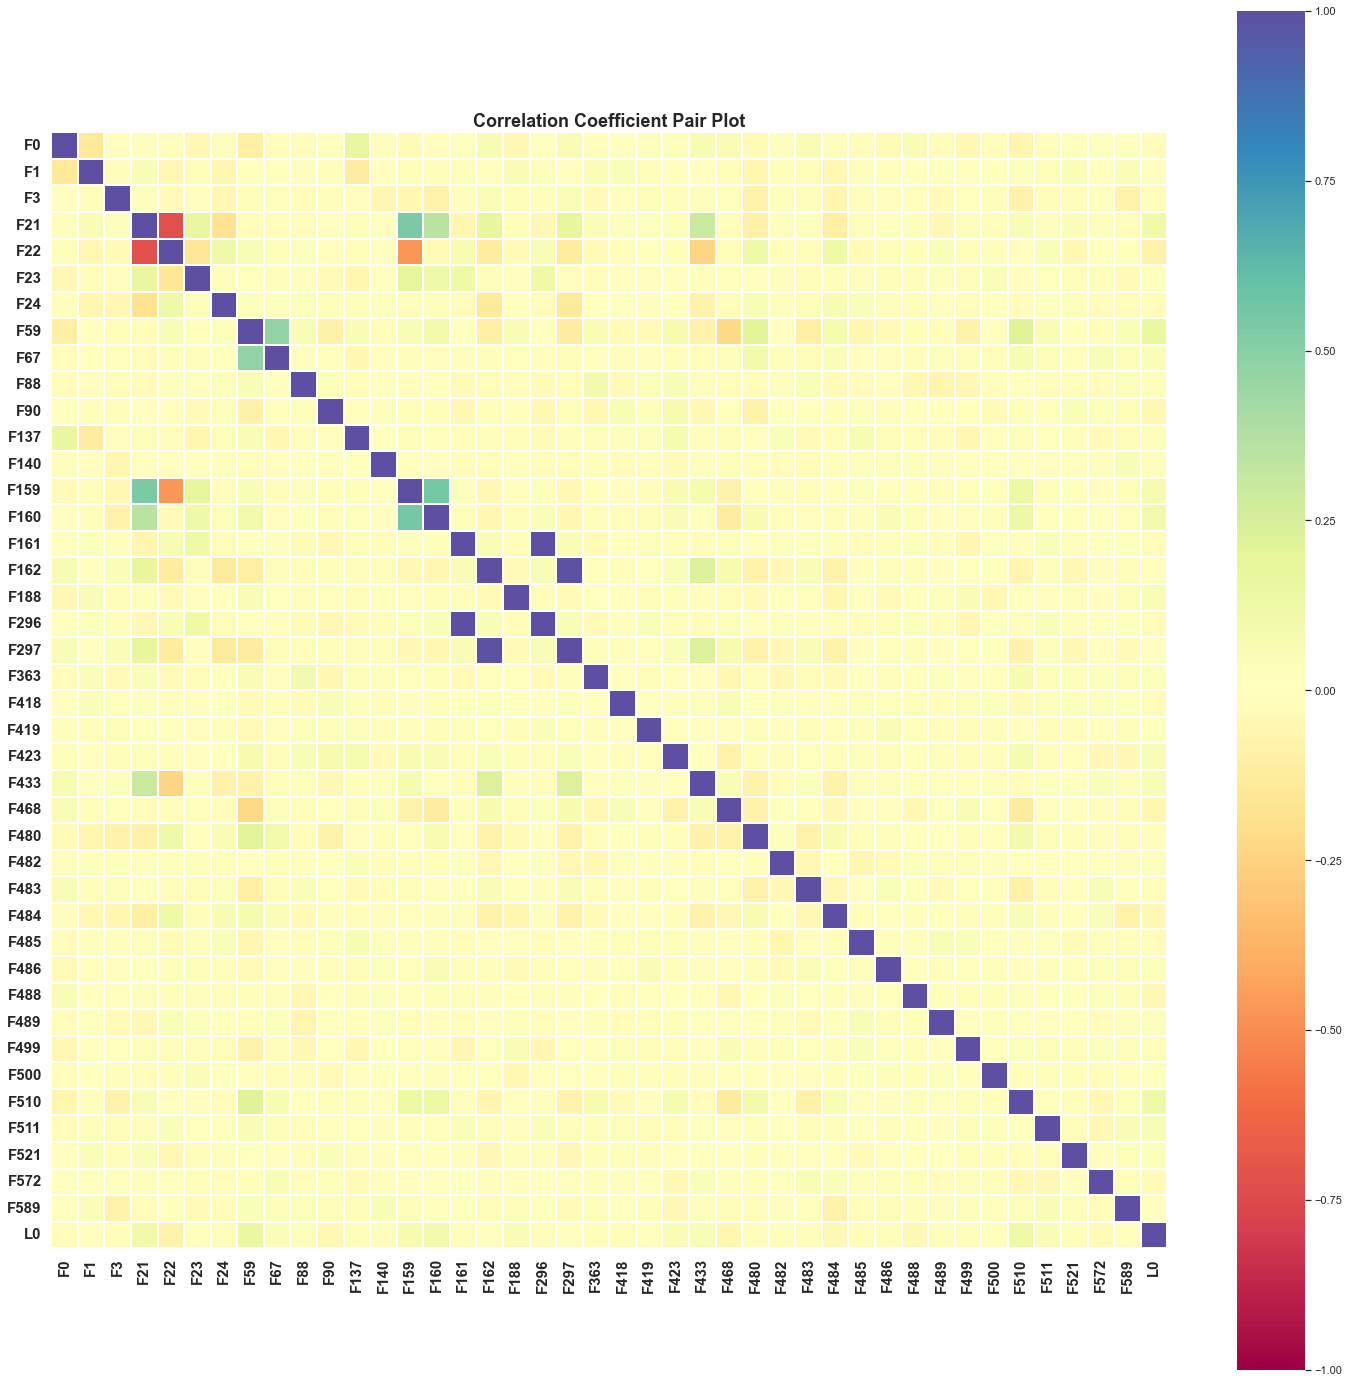

In [38]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
df1 = pd.concat([X,y],axis=1, ignore_index=False) 
ax = plt.axes()
corr = df1.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=False, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
plt.xticks(rotation=90,fontweight="bold", size=15) 
plt.yticks(rotation=0,fontweight="bold", size=15) 
plt.title('Correlation Coefficient Pair Plot', fontweight="bold", size=18)
plt.savefig('pcp.png')
plt.show()

TypeError: SymmetricalLogScale.__init__() got an unexpected keyword argument 'nonposy'

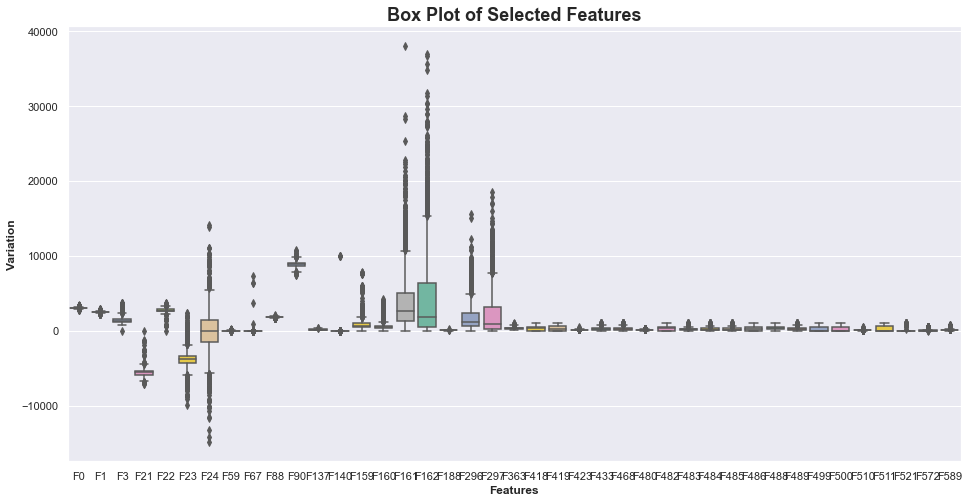

In [39]:
# Making box plot to explore features variations and outliers
# 상자그림으로 이상값 확인
plt.figure(figsize=(16,8))
sns.set()
sns.boxplot(data=X, orient="v", palette="Set2")
plt.xlabel('Features',fontweight="bold", size=12)
plt.ylabel('Variation',fontweight="bold", size=12)
plt.title('Box Plot of Selected Features', fontweight="bold", size=18)
plt.yscale('symlog', nonposy='clip')
plt.xticks(rotation=90)
plt.savefig('BoxPlot.png');plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15540\1849497503.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


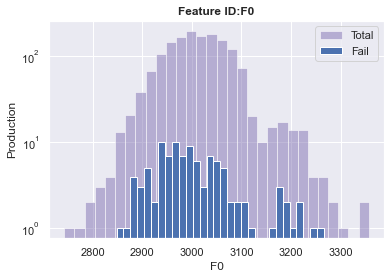

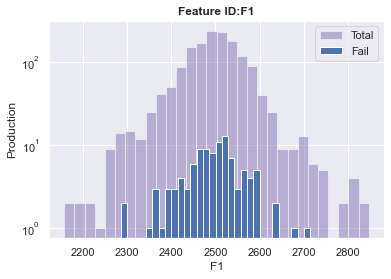

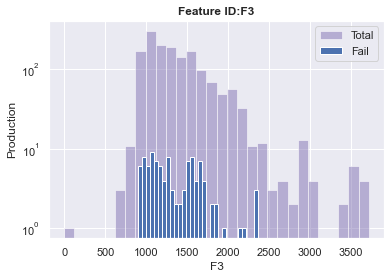

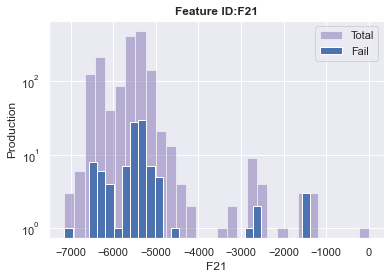

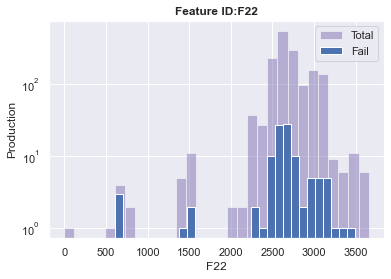

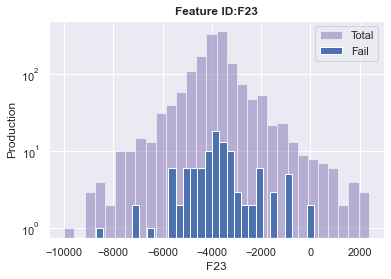

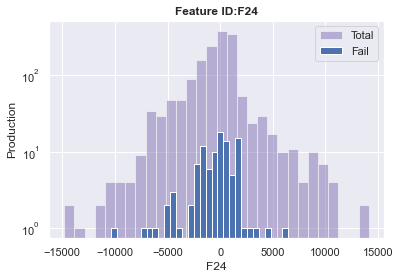

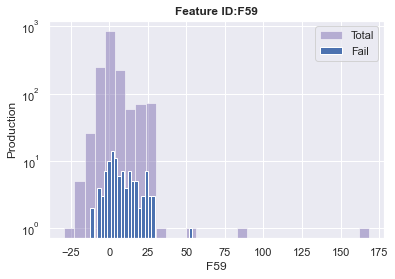

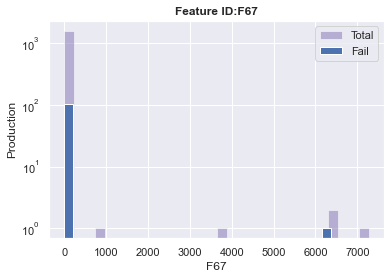

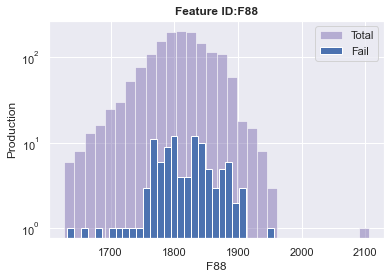

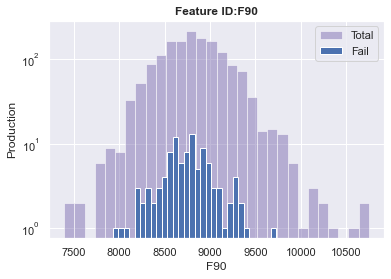

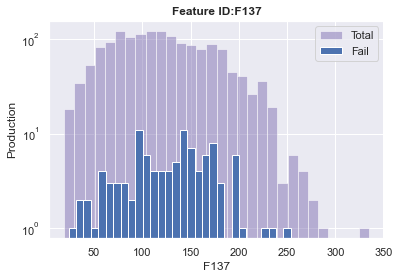

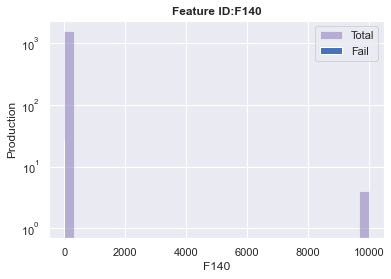

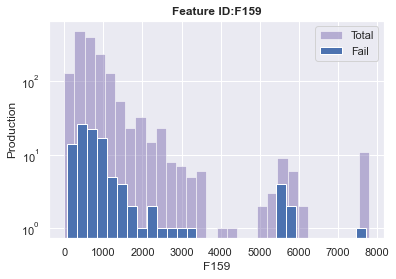

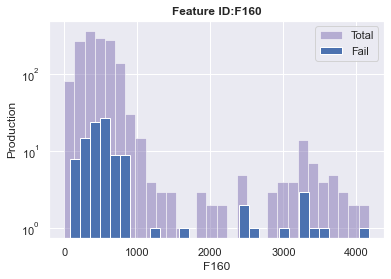

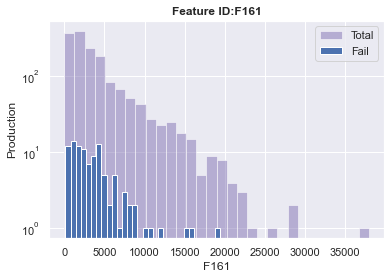

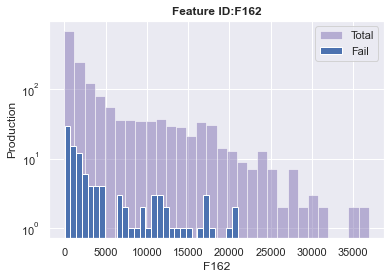

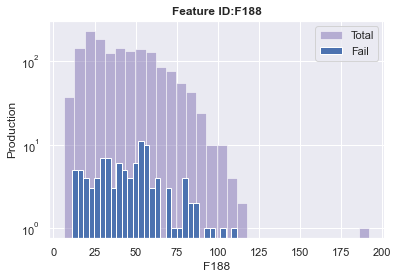

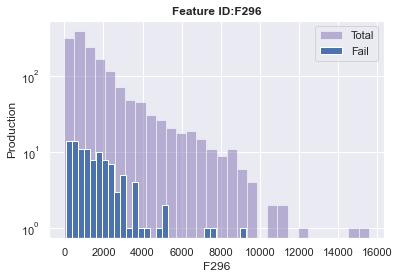

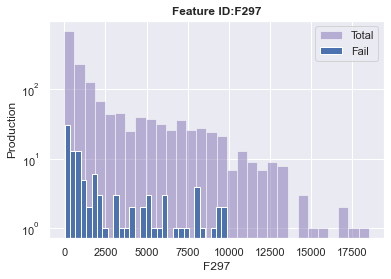

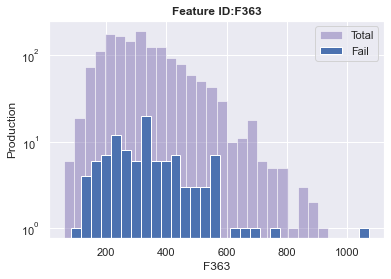

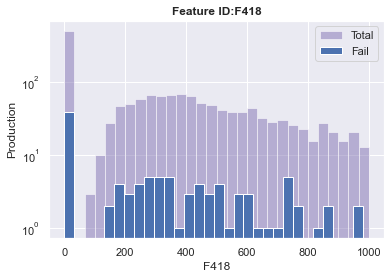

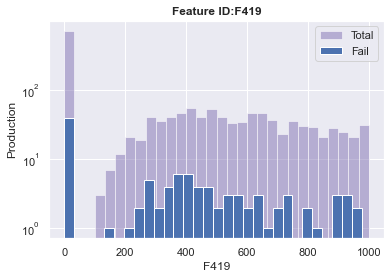

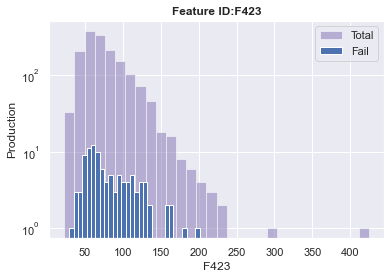

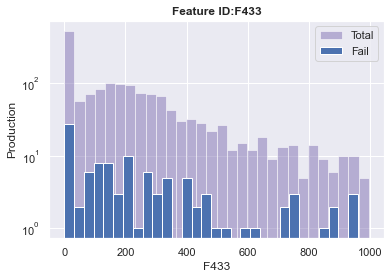

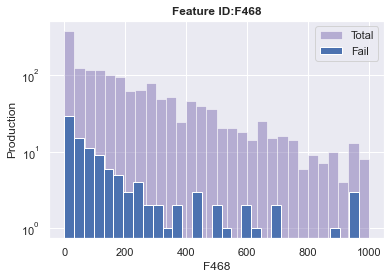

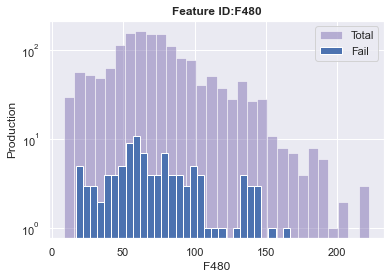

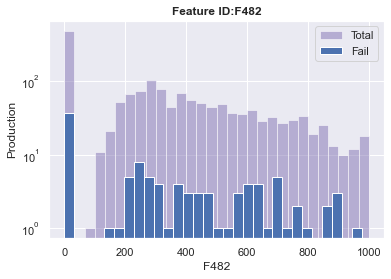

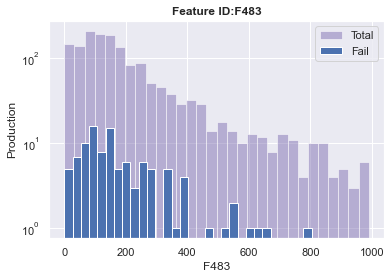

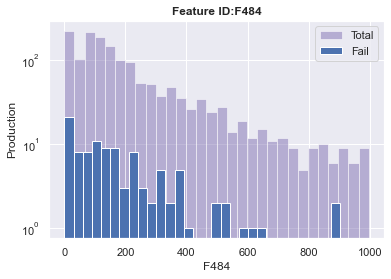

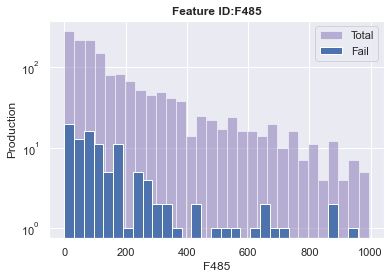

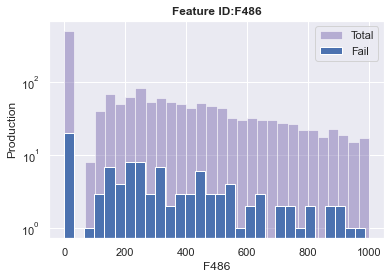

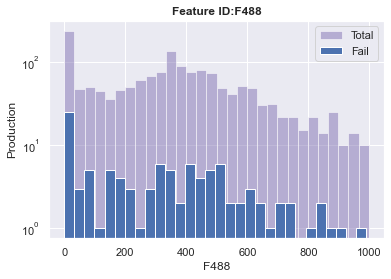

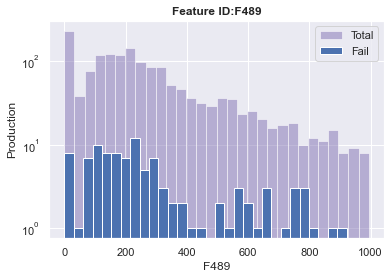

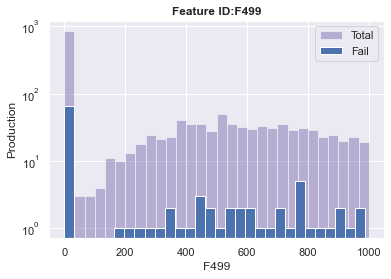

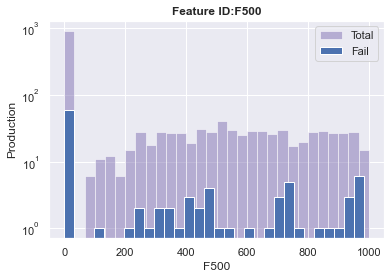

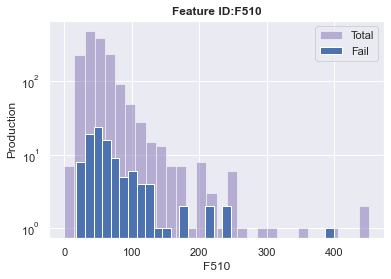

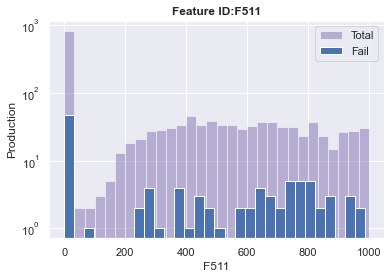

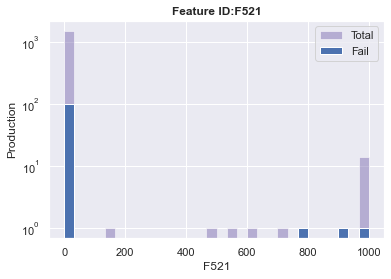

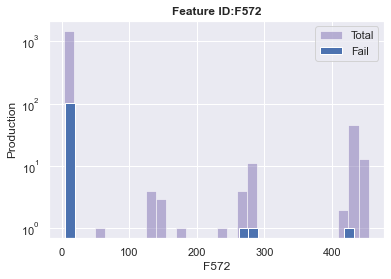

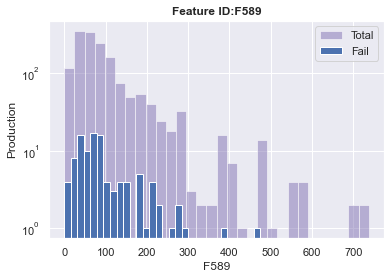

In [40]:
# Exploratory Data Analysis
# Plotting total products against failed product in histogram format  
bins = 30
for feature in feature_list:
    tf = feature
    plt.figure()
    plt.hist(df1[tf], bins = bins, color='m',label = 'Total',alpha=0.5)
    plt.hist(df1[tf][df1['L0'] == 1], bins = bins, color='b',label = 'Fail')

    plt.xlabel(tf);plt.ylabel('Production')
    plt.title('Feature ID:'+tf,fontweight="bold", size=12)
    plt.yscale('log')

    plt.legend();plt.savefig(tf+'.png');



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>